<a href="https://colab.research.google.com/github/natalia973/Data-Science-Data-Analytics/blob/main/Gr%C3%A1ficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Conjunto de Dados Simples**

Primeiro, vamos criar um conjunto de dados sobre vendas de produtos fictícios. Ele terá as seguintes colunas:

* **Produto**: O nome do produto (categórico).
* **Categoria**: A categoria do produto (categórica).
* **Preço**: O preço do produto (numérico).
* **Vendas**: O número de unidades vendidas (numérico).
* **Mês**: O mês da venda (sequencial).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para um visual mais agradável dos gráficos
sns.set_theme(style="whitegrid")

# Criar o DataFrame
data = {
    'Produto': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Categoria': ['Eletrônicos', 'Roupas', 'Eletrônicos', 'Livros', 'Roupas', 'Livros', 'Eletrônicos', 'Roupas', 'Livros', 'Roupas'],
    'Preço': [1200, 150, 800, 40, 200, 30, 950, 120, 55, 250],
    'Vendas': [50, 200, 80, 500, 150, 600, 70, 180, 450, 120],
    'Mês': pd.to_datetime(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01'])
}
df = pd.DataFrame(data)
df['Receita'] = df['Preço'] * df['Vendas']

# Exibir os primeiros registros do dataframe
df

,Produto,Categoria,Preço,Vendas,Mês,Receita
0,A,Eletrônicos,1200,50,2023-01-01,60000
1,B,Roupas,150,200,2023-02-01,30000
2,C,Eletrônicos,800,80,2023-03-01,64000
3,D,Livros,40,500,2023-04-01,20000
4,E,Roupas,200,150,2023-05-01,30000
5,F,Livros,30,600,2023-06-01,18000
6,G,Eletrônicos,950,70,2023-07-01,66500
7,H,Roupas,120,180,2023-08-01,21600
8,I,Livros,55,450,2023-09-01,24750
9,J,Roupas,250,120,2023-10-01,30000


### **1. Gráfico de Barras: Vendas por Produto**
Este gráfico é ótimo para comparar valores entre diferentes categorias. Aqui, vemos claramente qual produto vendeu mais e qual vendeu menos.

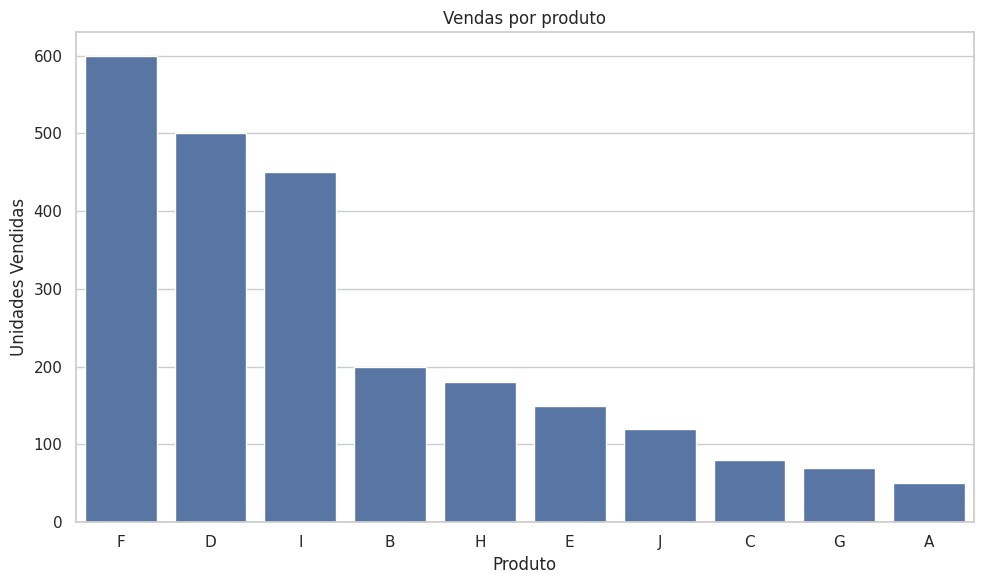

In [2]:
plt.figure(figsize=(10,6))
sns.barplot(data=df.sort_values('Vendas',ascending=False),x='Produto',y='Vendas')
plt.title("Vendas por produto")
plt.xlabel('Produto')
plt.ylabel('Unidades Vendidas')
plt.tight_layout()
plt.show()

### **2. Gráfico de Pizza: Distribuição de Vendas por Categoria**
O gráfico de pizza mostra a proporção de cada categoria no total de vendas. É útil para entender a composição de um todo.

In [ ]:
vendas_por_categoria = df.groupby(by='Categoria')['Vendas'].sum().reset_index(name='Vendas_totais')
vendas_por_categoria

,Categoria,Vendas_totais
0,Eletrônicos,200
1,Livros,1550
2,Roupas,650


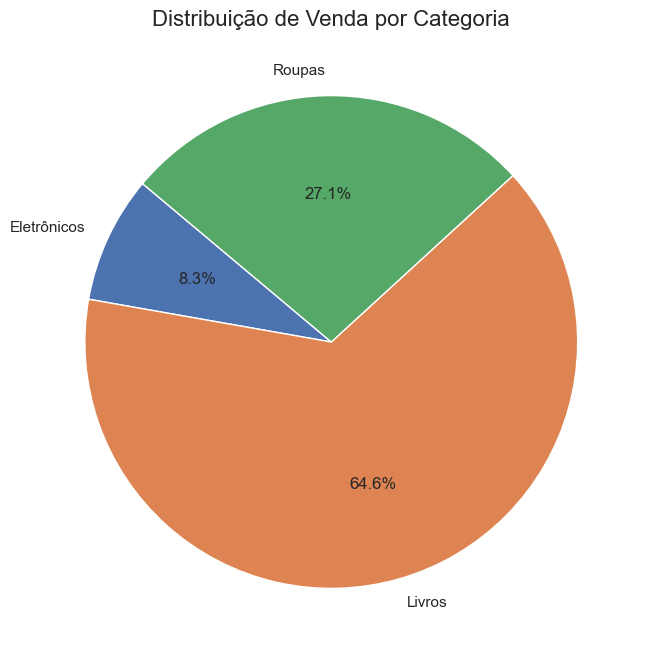

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data=vendas_por_categoria,labels='Categoria',autopct='%1.1f%%',x='Vendas_totais',startangle=140)
plt.title("Distribuição de Venda por Categoria",fontsize=16)
plt.ylabel('')
plt.show()

### **3. Gráfico de Linhas: Vendas ao Longo do Tempo**
Ideal para visualizar tendências em dados ao longo de um período. Neste gráfico, podemos observar como as vendas se comportaram mês a mês.

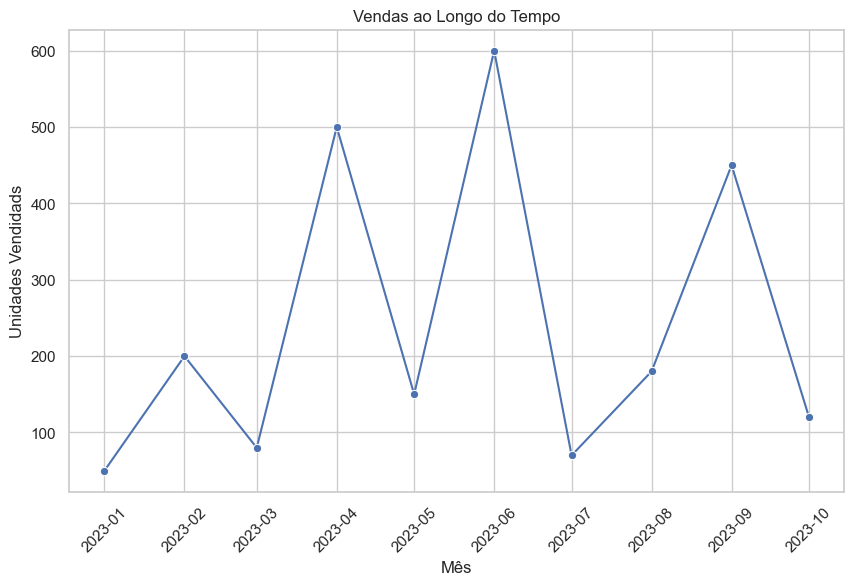

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x='Mês',y='Vendas',marker='o')
plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.ylabel('Unidades Vendidads')
plt.grid(True)
plt.show()

### **4. Gráfico de Dispersão (Scatter Plot): Relação entre Preço e Vendas**
Este gráfico ajuda a identificar a relação entre duas variáveis numéricas. Podemos ver se existe uma correlação entre o preço de um produto e o número de unidades vendidas.

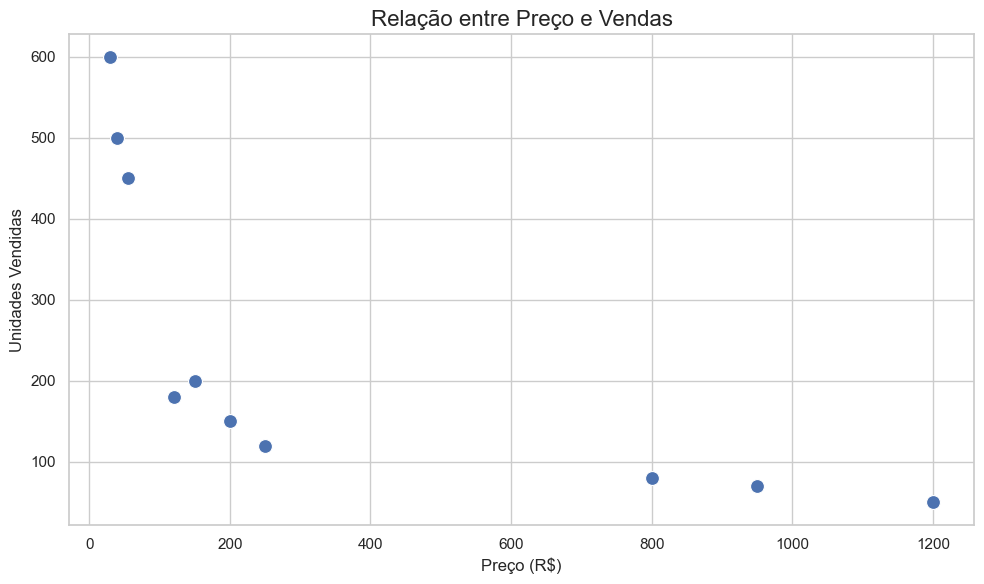

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Preço',y='Vendas',s=100)
plt.title('Relação entre Preço e Vendas',fontsize=16)
plt.xlabel('Preço (R$)')
plt.ylabel('Unidades Vendidas')
plt.tight_layout()
plt.show()

### **5. Histograma: Distribuição dos Preços dos Produtos**
Um histograma mostra a frequência de ocorrência de diferentes faixas de valores em um conjunto de dados. Aqui, vemos em qual faixa de preço a maioria dos produtos se concentra.

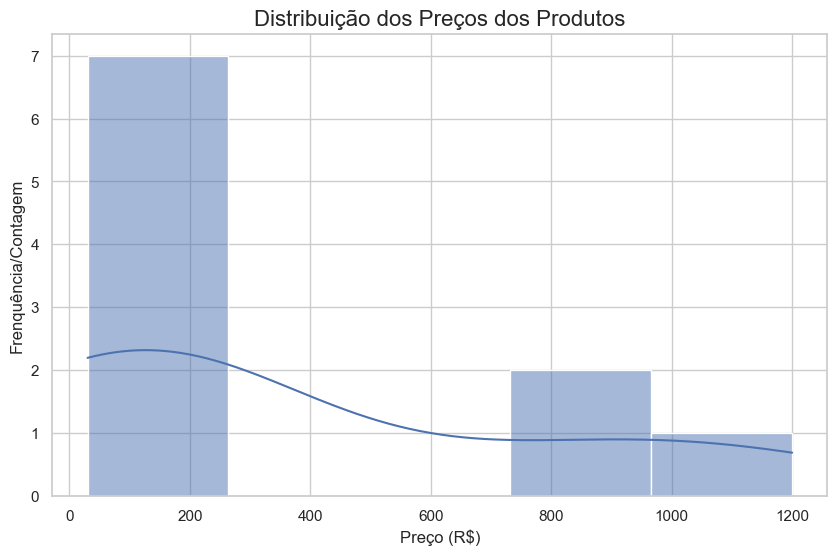

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Preço',bins=5,kde=True)
plt.title('Distribuição dos Preços dos Produtos',fontsize=16)
plt.xlabel('Preço (R$)')
plt.ylabel('Frenquência/Contagem')
plt.show()

### **6. Box Plot: Distribuição de Preços por Categoria**
O Box Plot é excelente para comparar a distribuição de dados entre diferentes grupos. Ele mostra a mediana, os quartis e os valores extremos (outliers) dos preços para cada categoria de produto.

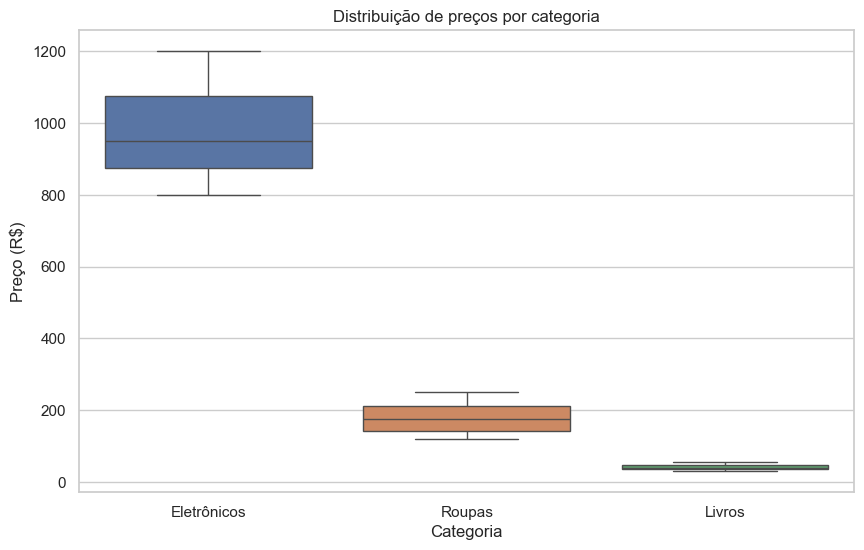

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Categoria',y='Preço',hue='Categoria')
plt.title('Distribuição de preços por categoria')
plt.xlabel('Categoria')
plt.ylabel('Preço (R$)')
plt.show()

### **7. Mapa de Calor (Heatmap): Correlação entre as Variáveis**
O mapa de calor representa a matriz de correlação de forma visual. Cores mais quentes indicam uma correlação positiva mais forte, enquanto cores mais frias indicam uma correlação negativa.

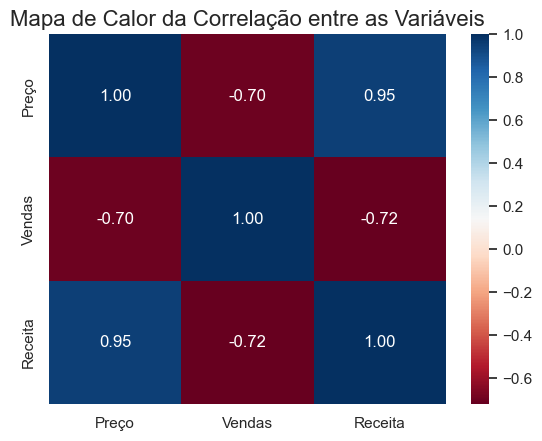

In [ ]:
corr_df = df.corr(numeric_only=True)
sns.heatmap(corr_df,annot=True,fmt=".2f",cmap='RdBu')
plt.title('Mapa de Calor da Correlação entre as Variáveis',fontsize=16)
plt.show()

### **8. Gráfico de Área: Receita Acumulada ao Longo do Tempo**
Similar ao gráfico de linhas, o gráfico de área preenche o espaço abaixo da linha, o que pode ajudar a visualizar o volume e a magnitude de uma mudança ao longo do tempo, como o crescimento da receita acumulada.

In [ ]:
df['Receita_acumulada'] = df['Receita'].cumsum()
df

,Produto,Categoria,Preço,Vendas,Mês,Receita,Receita_acumulada
0,A,Eletrônicos,1200,50,2023-01-01,60000,60000
1,B,Roupas,150,200,2023-02-01,30000,90000
2,C,Eletrônicos,800,80,2023-03-01,64000,154000
3,D,Livros,40,500,2023-04-01,20000,174000
4,E,Roupas,200,150,2023-05-01,30000,204000
5,F,Livros,30,600,2023-06-01,18000,222000
6,G,Eletrônicos,950,70,2023-07-01,66500,288500
7,H,Roupas,120,180,2023-08-01,21600,310100
8,I,Livros,55,450,2023-09-01,24750,334850
9,J,Roupas,250,120,2023-10-01,30000,364850


In [ ]:
df['Valor_anterior'] = df['Receita'].shift(1)
df['Diferença'] = df['Receita'] - df['Valor_anterior']
df

,Produto,Categoria,Preço,Vendas,Mês,Receita,Receita_acumulada,Valor_anterior,Diferença
0,A,Eletrônicos,1200,50,2023-01-01,60000,60000,NaN,NaN
1,B,Roupas,150,200,2023-02-01,30000,90000,60000.0,-30000.0
2,C,Eletrônicos,800,80,2023-03-01,64000,154000,30000.0,34000.0
3,D,Livros,40,500,2023-04-01,20000,174000,64000.0,-44000.0
4,E,Roupas,200,150,2023-05-01,30000,204000,20000.0,10000.0
5,F,Livros,30,600,2023-06-01,18000,222000,30000.0,-12000.0
6,G,Eletrônicos,950,70,2023-07-01,66500,288500,18000.0,48500.0
7,H,Roupas,120,180,2023-08-01,21600,310100,66500.0,-44900.0
8,I,Livros,55,450,2023-09-01,24750,334850,21600.0,3150.0
9,J,Roupas,250,120,2023-10-01,30000,364850,24750.0,5250.0


In [ ]:
df['Diferença_entre_rendas'] = df['Receita'] - df['Receita'].shift(1)
df

,Produto,Categoria,Preço,Vendas,Mês,Receita,Receita_acumulada,Valor_anterior,Diferença,Diferença_entre_rendas
0,A,Eletrônicos,1200,50,2023-01-01,60000,60000,NaN,NaN,NaN
1,B,Roupas,150,200,2023-02-01,30000,90000,60000.0,-30000.0,-30000.0
2,C,Eletrônicos,800,80,2023-03-01,64000,154000,30000.0,34000.0,34000.0
3,D,Livros,40,500,2023-04-01,20000,174000,64000.0,-44000.0,-44000.0
4,E,Roupas,200,150,2023-05-01,30000,204000,20000.0,10000.0,10000.0
5,F,Livros,30,600,2023-06-01,18000,222000,30000.0,-12000.0,-12000.0
6,G,Eletrônicos,950,70,2023-07-01,66500,288500,18000.0,48500.0,48500.0
7,H,Roupas,120,180,2023-08-01,21600,310100,66500.0,-44900.0,-44900.0
8,I,Livros,55,450,2023-09-01,24750,334850,21600.0,3150.0,3150.0
9,J,Roupas,250,120,2023-10-01,30000,364850,24750.0,5250.0,5250.0


In [ ]:
df = df[['Produto','Categoria','Preço','Vendas','Mês','Receita','Receita_acumulada']]
df

,Produto,Categoria,Preço,Vendas,Mês,Receita,Receita_acumulada
0,A,Eletrônicos,1200,50,2023-01-01,60000,60000
1,B,Roupas,150,200,2023-02-01,30000,90000
2,C,Eletrônicos,800,80,2023-03-01,64000,154000
3,D,Livros,40,500,2023-04-01,20000,174000
4,E,Roupas,200,150,2023-05-01,30000,204000
5,F,Livros,30,600,2023-06-01,18000,222000
6,G,Eletrônicos,950,70,2023-07-01,66500,288500
7,H,Roupas,120,180,2023-08-01,21600,310100
8,I,Livros,55,450,2023-09-01,24750,334850
9,J,Roupas,250,120,2023-10-01,30000,364850


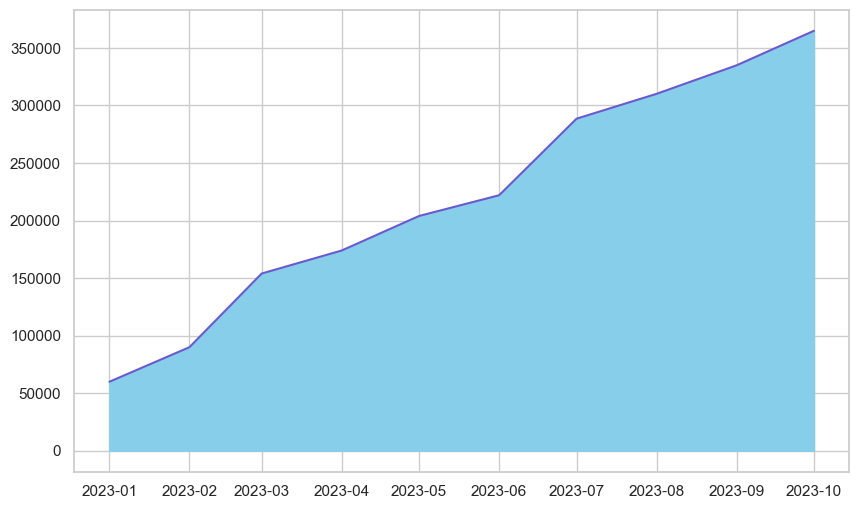

In [ ]:
plt.figure(figsize=(10,6))
plt.fill_between(data=df,x='Mês',y1='Receita_acumulada',color='skyblue')
plt.plot(df['Mês'],df['Receita_acumulada'],color='Slateblue')
plt.show()